# Indonesia Film Dashboard

# 1. Dashboard

Berikut adalah link untuk melihat [Dashboard Film Indonesia](https://public.tableau.com/views/Mileston1DashboardFilmIndonesia/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

*Tolong lihat dengan tampilan full screen untuk hasil maksimal

# 2. Identifikasi Masalah

## Problem statement

Saya bekerja di sebuah production house sebagai data analyst, atasan saya ingin membuat film tetapi tidak tau film seperti apa yang akan mendapatkan rating tinggi, saya sebagai seorang data analyst akan mencari tahu faktor-faktor yang membuat rating sebuah film tinggi, diharapkan dari hasil analysis ini atasan saya dapat menentukan akan membuat film seperti apa

penjabaran masalah:
1. Berapa rata-rata rating film di indonesia?
2. Genre apa yang memiliki rata-rata rating yang tinggi?
3. Bagaimana perbandingan genre film top 3 terbanyak pada tahun 2000 ke atas?
4. Apakah jumlah durasi, Bahasa, dan tahun rilis dapat berdampak pada rating?
5. Apakah film yang di rilis diatas tahun 2000 memiliki rating yang lebih besar dari yang dirilis sebelum tahun 2000?
6. Bagaimana perbandingan rating film pada tahun 2000 keatas?
7. Siapakah top 3 sutradara yang membuat banyak film pada tahun 2000 keatas?
8. Apakah semakin banyak film yang di buat oleh seorang sutradara, semakin tinggi ratingnya?
9. Apakah age restriction 13+ dan 17+ sama sama memiliki rating yang tinggi?


# 3. Data Loading

## a. Data Preparation

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Membuat data frame dari file csv
data = pd.read_csv('indonesian_movies.csv')
data

,movie_id,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,100001,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,100002,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,100003,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,100004,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,100005,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min
...,...,...,...,...,...,...,...,...,...,...,...,...
1267,101268,The Tiger from Tjampa,1953,"Set in the 1930s, and narrated like a ballad f...",Drama,NaN,6.4,30,Indonesian,D. Djajakusuma,"['Wahid Chan', 'Bambang Hermanto', 'R.D. Ismai...",97 min
1268,101269,Enam Djam di Djogja,1951,Depicting the celebrated recapture of the town...,Drama,NaN,6.3,9,Indonesian,Usmar Ismail,"['R.D. Ismail', 'Del Juzar', 'Aedy Moward', 'A...",116 min
1269,101270,Darah dan Doa,1950,It tells the story of an Indonesian revolution...,Drama,NaN,6.6,27,Indonesian,Usmar Ismail,"['Ella Bergen', 'Faridah', 'R.D. Ismail', 'Del...",150 min
1270,101271,Resia Boroboedoer,1928,NaN,Adventure,NaN,7.0,8,Indonesian,NaN,"['Olive Young', nan, nan, nan, nan, nan, nan, ...",NaN


In [3]:
# Menampilkan data untuk dilakukan data cleaning
data.info()
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      1272 non-null   int64  
 1   title         1272 non-null   object 
 2   year          1272 non-null   int64  
 3   description   840 non-null    object 
 4   genre         1236 non-null   object 
 5   rating        376 non-null    object 
 6   users_rating  1272 non-null   float64
 7   votes         1272 non-null   object 
 8   languages     1272 non-null   object 
 9   directors     1265 non-null   object 
 10  actors        1272 non-null   object 
 11  runtime       869 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 119.4+ KB


np.int64(0)

# 4. Data Cleaning:
1. Merubah naming rating menjadi age_restriction
2. Merubah user rating menjadi rating
3. Merubah tipe data runtime menjadi integer dan merubah naming kolom menjadi runtime(menit)
4. Mengisi kolom yang null

In [4]:
# Merubah naming kolom rating,user rating, dan runtime
data = data.rename(columns={'runtime' : 'runtime(menit)'})
data.columns.values[5] = 'age_restriction'
data.columns.values[6] = 'rating'
data

,movie_id,title,year,description,genre,age_restriction,rating,votes,languages,directors,actors,runtime(menit)
0,100001,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,100002,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,100003,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,100004,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,100005,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min
...,...,...,...,...,...,...,...,...,...,...,...,...
1267,101268,The Tiger from Tjampa,1953,"Set in the 1930s, and narrated like a ballad f...",Drama,NaN,6.4,30,Indonesian,D. Djajakusuma,"['Wahid Chan', 'Bambang Hermanto', 'R.D. Ismai...",97 min
1268,101269,Enam Djam di Djogja,1951,Depicting the celebrated recapture of the town...,Drama,NaN,6.3,9,Indonesian,Usmar Ismail,"['R.D. Ismail', 'Del Juzar', 'Aedy Moward', 'A...",116 min
1269,101270,Darah dan Doa,1950,It tells the story of an Indonesian revolution...,Drama,NaN,6.6,27,Indonesian,Usmar Ismail,"['Ella Bergen', 'Faridah', 'R.D. Ismail', 'Del...",150 min
1270,101271,Resia Boroboedoer,1928,NaN,Adventure,NaN,7.0,8,Indonesian,NaN,"['Olive Young', nan, nan, nan, nan, nan, nan, ...",NaN


In [5]:
# Merubah tipe data runtime menjadi int

# Menghapus kata min dalam kolom runtime
data['runtime(menit)'] = data['runtime(menit)'].str.replace('min','')

# Mengisi kolom null dengan nilai 0

data['runtime(menit)'] = data['runtime(menit)'].fillna(0)

# Merubah tipe datanya menjadi int
data['runtime(menit)'] = data['runtime(menit)'].astype(int)


In [6]:
# Merubah data null menjadi nilai median
data['runtime(menit)'].median()
data['runtime(menit)'] = data['runtime(menit)'].replace(0 , 89)

In [7]:
# Mengisi kolom null dengan '-'
data = data.fillna('-')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1272 non-null   int64  
 1   title            1272 non-null   object 
 2   year             1272 non-null   int64  
 3   description      1272 non-null   object 
 4   genre            1272 non-null   object 
 5   age_restriction  1272 non-null   object 
 6   rating           1272 non-null   float64
 7   votes            1272 non-null   object 
 8   languages        1272 non-null   object 
 9   directors        1272 non-null   object 
 10  actors           1272 non-null   object 
 11  runtime(menit)   1272 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 119.4+ KB


In [10]:
# Menyimpan data frame data menjadi csv
data.to_csv('data_clean.csv')

# 5. Analisis dan Perhitungan

## a. Berapa rata-rata rating film di indonesia?

In [36]:
print('Rata-rata pada kolom rating:',data['rating'].mean())
print('Nilai tengah pada kolom rating:',data['rating'].median())

q1_rating = data['rating'].quantile(0.25)
q2_rating = data['rating'].quantile(0.5)
q3_rating = data['rating'].quantile(0.75)
iqr_rating = q3_rating - q1_rating

print('Q1 pada kolom rating:',q1_rating)
print('Q2 pada kolom rating:',q2_rating)
print('Q3 pada kolom rating:',q3_rating)
print('IQR pada kolom rating:',iqr_rating)

Rata-rata pada kolom rating: 6.144418238993711
Nilai tengah pada kolom rating: 6.4
Q1 pada kolom rating: 5.3
Q2 pada kolom rating: 6.4
Q3 pada kolom rating: 7.1
IQR pada kolom rating: 1.7999999999999998


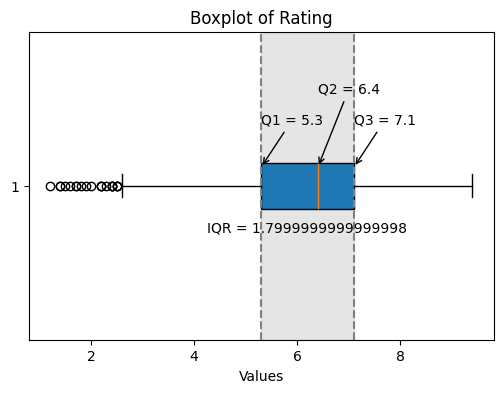

In [ ]:
# Membuat Grafik Box plot based on kolom rating
plt.figure(figsize=(6, 4))
plt.boxplot(data['rating'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1_rating}', xy=(q1_rating, 1.06), xytext=(q1_rating, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2_rating}', xy=(q2_rating, 1.06), xytext=(q2_rating, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3_rating}', xy=(q3_rating, 1.06), xytext=(q3_rating, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr_rating}', xy=((q1_rating+q3_rating)/2, 0.85), ha='center')

plt.axvline(q1_rating, linestyle='--', color='gray', label='Q1')
plt.axvline(q3_rating, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1_rating, q3_rating, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of Rating')

plt.show()

INSIGHT

Rata-rata rating film indonesia adalah 6.14 dan ternyata untuk rating film indonesia terdapat banyak outlier yang melebihi batas bawahnya, dan banyak data yang tersebar di rentang rating 5.3 sampai 7.1

## b. Genre apa yang memiliki rata-rata rating yang tinggi?

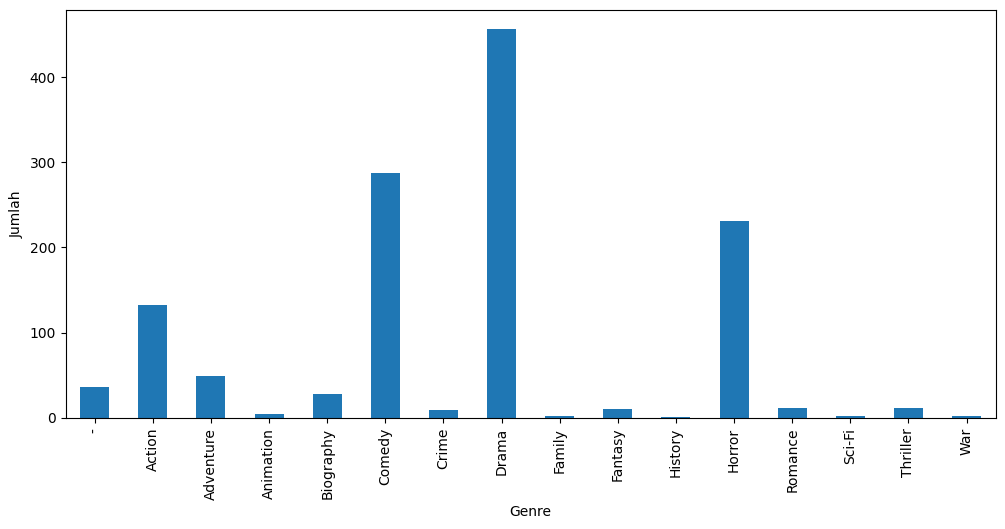

In [47]:
# Menampilkan barchart untuk kolom genre
plt.figure(figsize=(12,6))
data['genre'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom=0.2)
plt.show()

In [51]:
data.groupby('genre')[['rating']].mean().sort_values(by='rating', ascending=False)

,rating
genre,
History,7.500000
Biography,7.360714
Family,7.100000
Drama,6.745833
Romance,6.654545
War,6.550000
-,6.302778
Adventure,6.271429
Crime,6.244444


INSIGHT

Dari bar chart kita bisa menyimpulkan bahwa top 3 genre yang sering dibuat adalah drama, comedy, dan horror. tetapi jika di lihat dari rata-rata ratingnya, genre drama memang memiliki rata-rata rating yang tinggi dengan jumlah film terbanyak dengan rata-rat rating 6.75. Sedangkan genre comedy memiliki jumlah film terbanyak ke 2 tetapi hanya memiliki rata-rata rating sebesar 5.9 dan begitu juga dengan genre horror posisi ke 3 di jumlah film tetapi rata-rata ratingnya 5.0, rata-rata rating mereka kalah dengan genre action yang memiliki jumlah film terbanyak ke 4 justru genre action memiliki rata-rata rating yang cukup tinggi yaitu 6.01  

## c. Bagaimana perbandingan genre film top 3 terbanyak pada tahun 2000 ke atas?

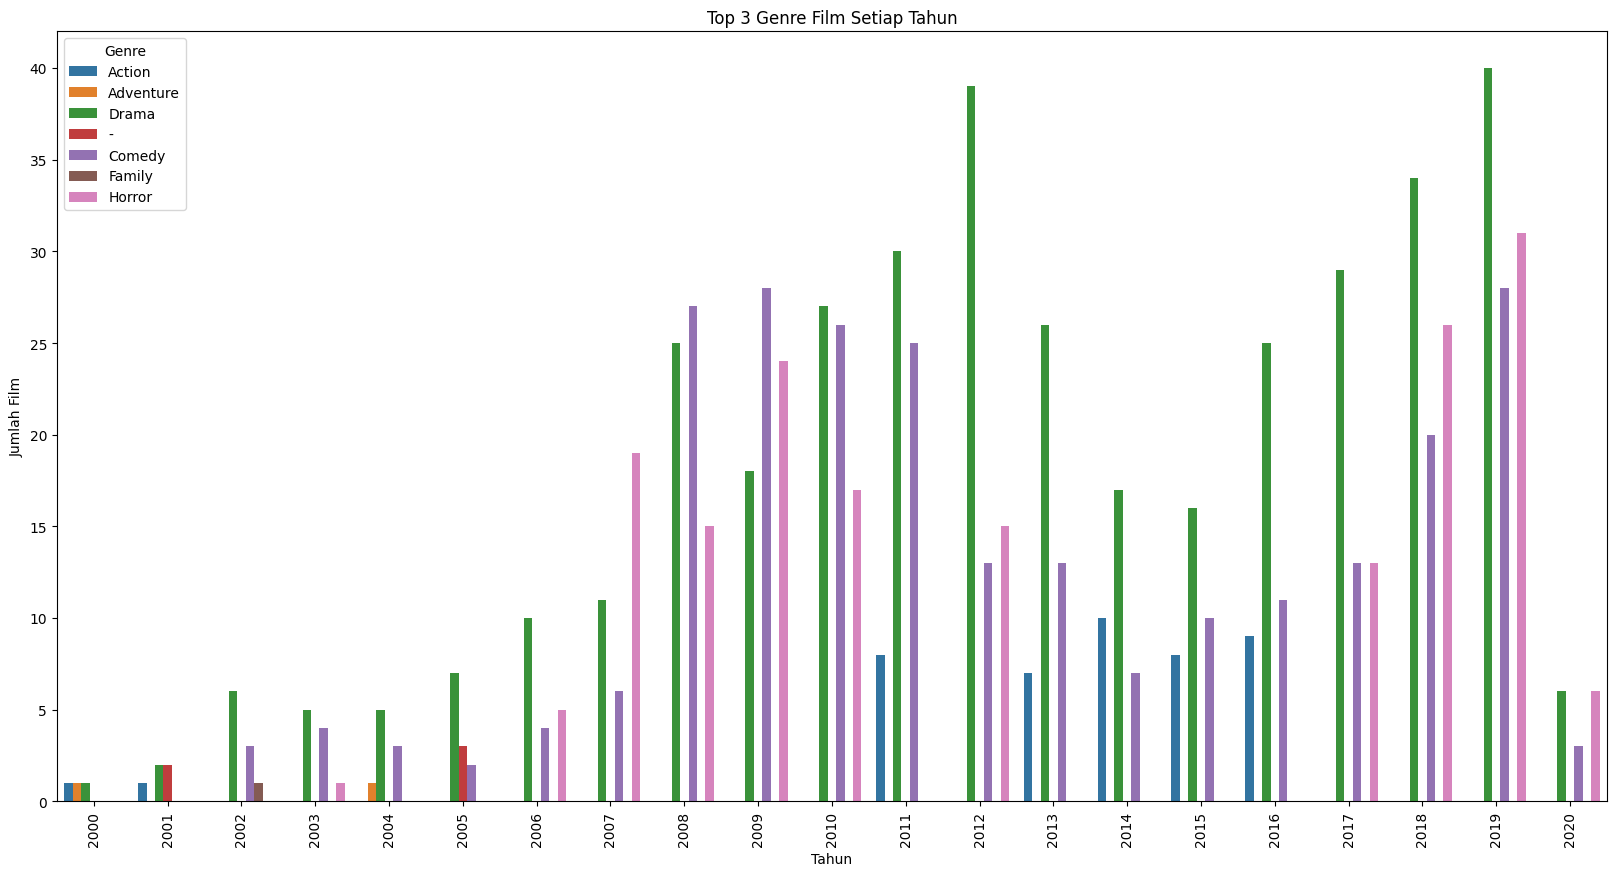

In [ ]:
# Membuat gruping by kolom year dan menghitung value pada kolom genre
top_genre = data.groupby('year')['genre'].value_counts()

# Memfilter data yang diambil hanya yang tahunnya diatas = 2000
df_topgenre = top_genre.reset_index(name = 'count')
df_topgenre = df_topgenre.query('year >= 2000')
top_genre_per_year = df_topgenre.groupby('year').head(3)

# Visualisasi dengan bar chart
plt.figure(figsize=(20, 10))
sns.barplot(data=top_genre_per_year, x='year', y='count', hue='genre')
plt.title("Top 3 Genre Film Setiap Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Film")
plt.xticks(rotation = 90)
plt.legend(title="Genre")
plt.show()

INSIGHT

Dari barchart diatas kita bisa menarik kesimpulan bahwa genre film yang sering dibuat dari tahun 2000 keatas adalah genre drama, yang kedua adalah komedi dan yang ketiga horror

## d. Apakah jumlah durasi, Bahasa, dan tahun rilis dapat berdampak pada peningkatan rating?

<Axes: xlabel='languages'>

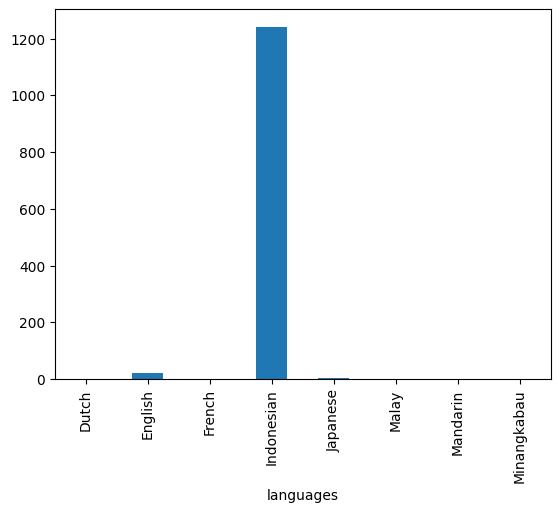

In [14]:
# Mmbuat kolom barchart untuk kolom bahasa
data['languages'].value_counts().sort_index().plot(kind='bar')

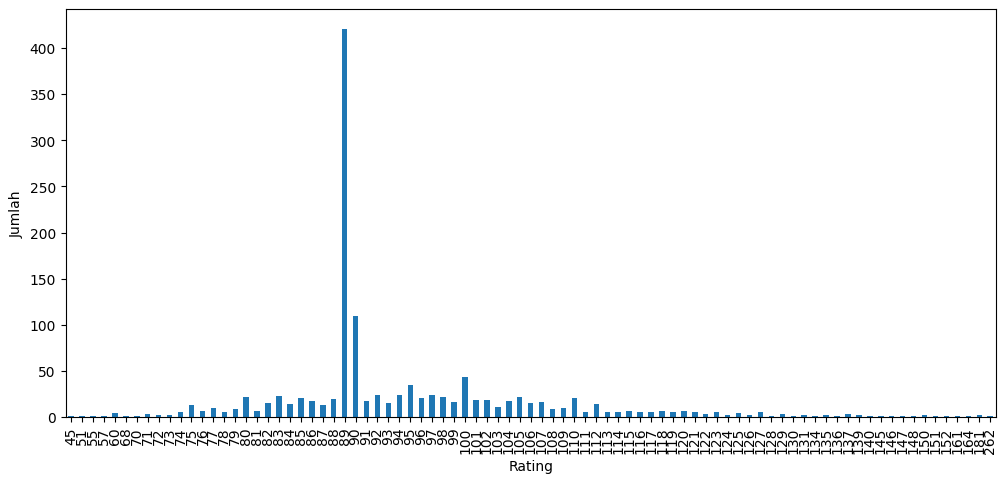

In [15]:
# Membuat grafik barchart pada kolom runtime
plt.figure(figsize=(12, 6)) 

data['runtime(menit)'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)  
plt.subplots_adjust(bottom=0.2) 

plt.show()

H0 = Variabel languages dan rating tidak berhubungan

H1 = Variabel languages dan rating berhubungan

In [8]:
# Pengujian hipetesis dengan chisquare
cross = pd.crosstab(data['languages'],data['rating'])
pval = stats.chi2_contingency(cross).pvalue
prompt = "mereka dependen" if pval<0.05 else ""
print(f"P-Value pf languages dan kolom rating {pval} {prompt}")

P-Value pf languages dan kolom rating 0.9999845264483089 


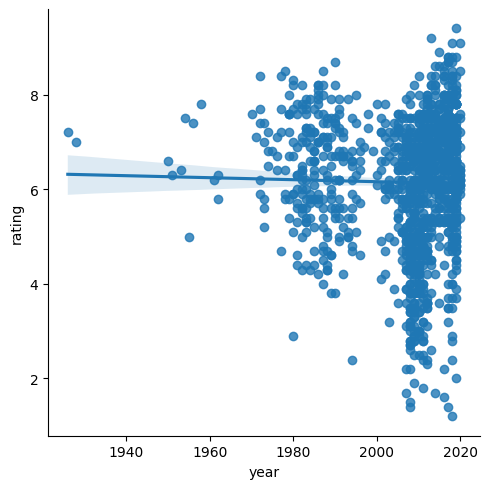

In [ ]:
# Membuat kolom korelasi antara year dengan rating
sns.lmplot(data=data,x='year', y='rating')

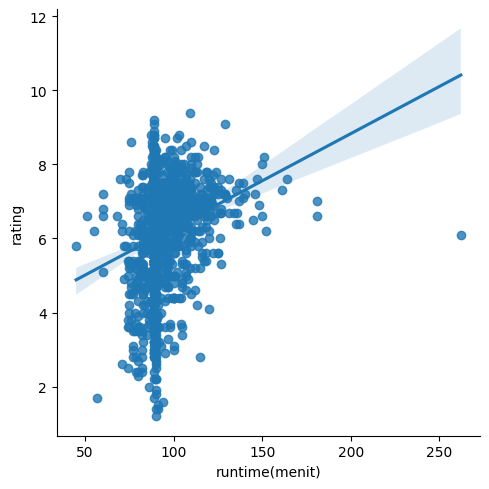

In [13]:
# Membuat kolom korelasi antara runtime dengan rating
sns.lmplot(data=data,x='runtime(menit)', y='rating')

In [ ]:
# Pengujian korelasi antara kolom year, dan runtime dengan kolom rating
cols = ['year', 'runtime(menit)']

for col in cols:
    corr, pval = stats.spearmanr(data[col], data['rating'])
    print(f'rho-correlation: {corr:.2f}, p-value: {pval:.2f}')

rho-correlation: 0.13, p-value: 0.00
rho-correlation: 0.27, p-value: 0.00


INSIGHT:

Meskipun jumlah film yang menggunakan bahasa indonesia terbanyak,dan film yang memiliki durasi 89 menit juga terbanyak. Pada test chi square yang kita lakukan kita bisa berasumsi bahwa bahasa tidak memiliki hubungan dengan rating, dan melalui uji korelasi dengan metode spearmen untuk kolom tahun, dan durasi dengan kolom rating menunjukkan nilai p-value = 0 ini menunjukkan bahwa mereka memiliki hubungan yang sangat signifikan secara statistik, tetapi jika dilihat dari rho-correlationnya yang memiliki nilai mendekati 0 menunjukkan bahwa mereka memiliki hubungan yang lemah, jadi kita bisa berasumsi bahwa kolom year dan runtime memiliki hubungan positif yang lemah terhadap kolom rating

## e. Apakah film yang di rilis diatas tahun 2000 memiliki rating yang lebih besar dari yang dirilis sebelum tahun 2000

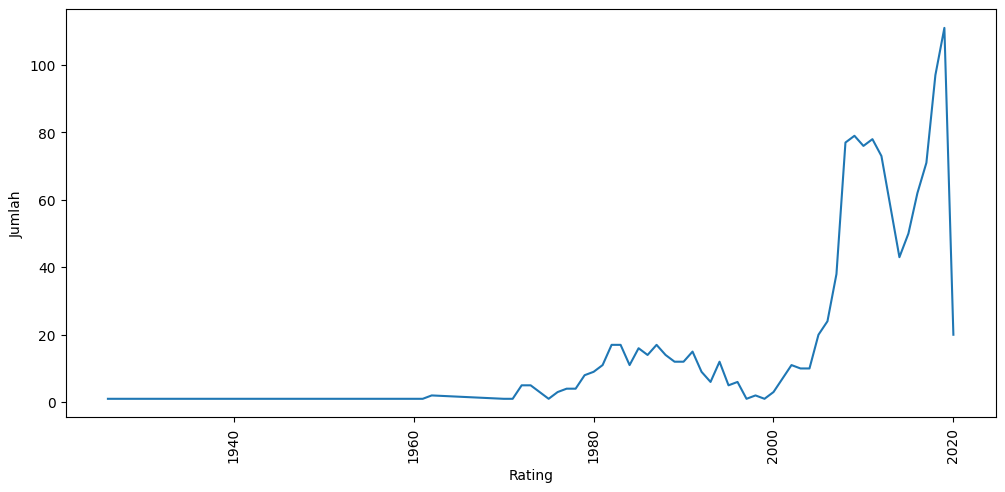

In [ ]:
# Membuat grafik linechart pada kolom tahun
plt.figure(figsize=(12, 6)) 

data['year'].value_counts().sort_index().plot(kind='line')

plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)  
plt.subplots_adjust(bottom=0.2) 

plt.show()

HIPOTESIS

H0 = film yang dirilis <= 2000 memiliki rating lebih tinggi

H1 = film yang di rilis > 2000 memiliki rating lebih tinggi

In [ ]:
# Pengujian hipotesis dengan metode independent t test
before_2000 = data[data['year'] < 2000]['rating']
after_2000 = data[data['year'] >= 2000]['rating']

t_stat, p_value = stats.ttest_ind(before_2000, after_2000, alternative='less')  
print(f'T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}')

T-statistic: 3.2542, P-value: 0.9994


INSIGHT

Meskipun jumlah film yang di rilis pada tahun diatas 2000 lebih banyak dari pada sebelum tahun 2000, tetapi hasil test menunjukkan nilai p value > 0.05 jadi kita bisa berasumsi bahwa rating film sebelum 2000 dan setelah 2000 secara statistik tidak berbeda signifikan, atau bisa jadi film sebelum 2000 justru memiliki rating lebih tinggi.

## f. Bagaimana perbandingan rating film pada tahun diatas 2000?

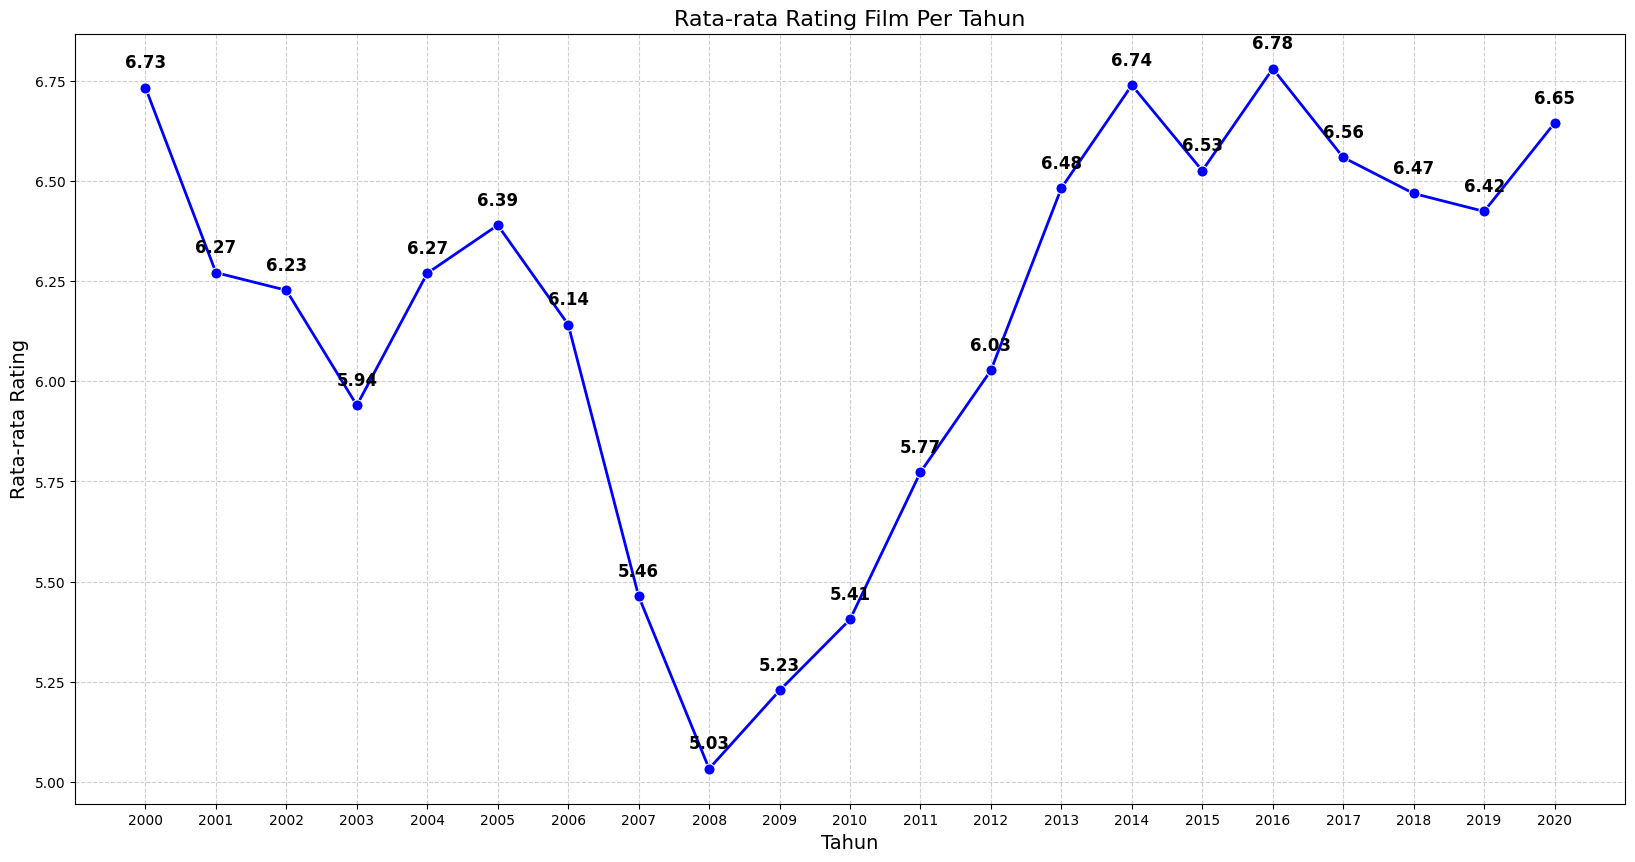

In [36]:
# Memfilter data hanya mengambil yang tahunnya >= 2000
data_rate = data.query('year >= 2000')

# Menghitung rata-rata rating per tahun
avg_rating = data_rate.groupby('year')['rating'].mean().reset_index()

# Membuat line chart
plt.figure(figsize=(20, 10))
ax = sns.lineplot(data=avg_rating, x='year', y='rating', marker='o', linewidth=2, markersize=8, color="blue")

# Menampilkan nilai rating di setiap titik
for x, y in zip(avg_rating['year'], avg_rating['rating']):
    plt.text(x, y + 0.05, f'{y:.2f}', ha='center', fontsize=12, fontweight='bold')

# Memberi label dan judul
plt.title("Rata-rata Rating Film Per Tahun", fontsize=16)
plt.xlabel("Tahun", fontsize=14)
plt.ylabel("Rata-rata Rating", fontsize=14)
plt.xticks(avg_rating['year'], avg_rating['year'].astype(int))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


INSIGHT

Dari linechart diatas kita bisa menarik kesimpulan bahwa rata-rata rating film tertinggi berada di tahun 2016 dengan nilai 6.78 dan rata-rata rating terendah berada di tahun 2008 dengan nilai 5.03 pada tahun 2020 rata-rata ratingnya berada di posisi keempat dengan nilai 6.65

## g. Siapakah top 3 sutradara yang membuat banyak film pada tahun diatas 2000?

In [ ]:
# Memfilter data hanya mengambil film dengan tahun >= 2000
data_directors = data.query('year >= 2000')

# Menghitung rata-rata rating dan jumlah film per sutradara
avg_directors = data_directors.groupby('directors').agg(
    rating_mean=('rating', 'mean'),    
    film_count=('directors', 'count')  
).reset_index()  

# Mengurutkan berdasarkan jumlah film (dari tertinggi ke terendah)
avg_directors = avg_directors.sort_values(by='film_count', ascending=False)

avg_directors

,directors,rating_mean,film_count
202,Nayato Fio Nuala,4.675410,61
238,Rizal Mantovani,5.638235,34
126,Hanung Bramantyo,6.587097,31
194,Monty Tiwa,6.278261,23
108,Findo Purwono,4.595238,21
...,...,...,...
300,Yan Senjaya,5.100000,1
301,Yandy Laurens,7.900000,1
2,A. Liong Wong,5.300000,1
1,A. Leung Wong,6.000000,1


INSIGHT

Pada tabel diatas kita bisa melihat top 3 sutradara yang membuat banyak film ditahun 2000 ke atas adalah Nayato Fio Nuala dengan rata-rata rating 4.68, Rixal Mantovani dengan rata-rata rating 5.64, dan Hanung Bramantyo dengan rata-rata rating 6.59

## h. Apakah semakin banyak film yang di buat oleh seorang sutradara, semakin tinggi ratingnya?

In [ ]:
# Menunjukkan jumlah film yang dibuat oleh setiap sutradara
print(data['directors'].value_counts().to_string())


directors
Nayato Fio Nuala               61
Rizal Mantovani                34
Hanung Bramantyo               31
Arizal                         28
Sisworo Gautama Putra          23
Monty Tiwa                     23
Rudy Soedjarwo                 21
Findo Purwono                  21
Jose Poernomo                  21
Rako Prijanto                  20
Guntur Soeharjanto             19
Awi Suryadi                    17
Hanny Saputra                  16
Garin Nugroho                  15
Helfi C.H. Kardit              15
Fajar Nugros                   15
Riri Riza                      15
Ody C. Harahap                 15
Anggy Umbara                   14
Arie Azis                      13
Imam Tantowi                   12
Benni Setiawan                 12
H. Tjut Djalil                 11
Teguh Karya                    10
Chaerul Umam                   10
Upi Avianto                    10
Iqbal Rais                      9
Rocky Soraya                    9
Sjuman Djaya                    9
Tedd

In [13]:
# Menghitung jumlah film yang sudah dibuat oleh setiap sutradara
jumlah_film = data.groupby('directors')['rating'].count()

# Menghitung rata-rata rating film setiap sutradara
ratingfilm_sutradara = data.groupby('directors')['rating'].mean()

# Mengecek korelasi antara jumlah film yang sudah dibuat dengan rata-rata rating filmnya
df_korelasi = pd.DataFrame({"jumlah_film" : jumlah_film, "ratingfilm_sutradara" : ratingfilm_sutradara})

# Menguji korelasi dengan pearson dan spearman
corr_pearson, p_pearson = stats.pearsonr(df_korelasi['jumlah_film'], df_korelasi['ratingfilm_sutradara'])
corr_spearman, p_spearman = stats.spearmanr(df_korelasi['jumlah_film'], df_korelasi['ratingfilm_sutradara'])

print(f'Pearson correlation : {corr_pearson:.2f}, P-value : {p_pearson}')
print(f'Spearman correlation : {corr_spearman:.2f}, P-value : {p_spearman}')

Pearson correlation : -0.04, P-value : 0.444442065689813
Spearman correlation : 0.03, P-value : 0.5363866784898452


INSIGHT

Setelah dilakukan korelasi test dengan menggunakan pearson dan spearman menunjukkan sedikit perbedaan, pada testing dengan pearson menunjukkan korelasi negatif yang sangat lemah dan dari nilai p-valuenyapun menunjukkan bahwa korelasinya tidak signifikan. pengujian dengan spearman menunjukkan bahwa ada korelasi positif yang sangat lemah dari banyak film setiap sutradara dengan ratingnya, dan untuk p-valuenya sama seperti pearson dia menunjukkan bahwa korelasinya tidak signifikan. Sehingga kita bisa berasumsi bahwa sutradara yang sudah membuat banyak film belum bisa dipastikan bahwa rating filmnya akan tinggi 

## i. Apakah age restriction 13+ dan 17+ sama sama memiliki rating yang tinggi?

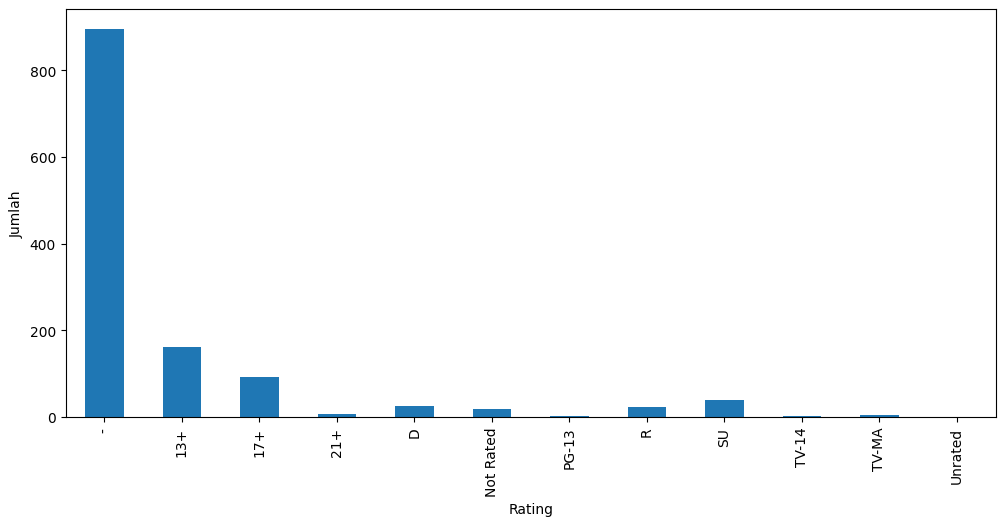

In [ ]:
# Membuat grafik barchart pada kolom age_restriction
plt.figure(figsize=(12, 6)) 

data['age_restriction'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)  
plt.subplots_adjust(bottom=0.2) 

plt.show()

# - adalah null value

HIPOTESIS

H0 = tidak ada hubungan antara rating 13+, 17+ dengan rating

Ha = ada hubungan antara rating 13+,17+ dengan rating

In [ ]:
# Mengambil data 13+ dan 17+ pada kolom age_restriction
df_filtered = data[data["age_restriction"].isin(["13+", "17+"])]

contingency_table = pd.crosstab(df_filtered['age_restriction'], df_filtered['rating'])



rating,1.2,1.4,2.0,2.2,2.4,2.8,2.9,3.2,3.5,3.7,...,8.0,8.1,8.2,8.3,8.4,8.5,8.7,8.8,9.1,9.4
age_restriction,,,,,,,,,,,,,,,,,,,,,
13+,1,1,0,0,1,1,0,1,2,2,...,6,2,1,1,3,2,1,2,2,1
17+,0,0,1,1,1,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [23]:
res = stats.chi2_contingency(contingency_table)
print("P-value :",res.pvalue)

P-value : 0.10643706211112117


INSIGHT

Dari hasil chisquare menunjukkan nilai p-value > critical value, sehingga kita bisa berasumsi bahwa age restriction 13+ dan 17+ meskipun memiliki jumlah film yang banyak, dia tidak ada hubungannya dengan rating dari sebuah film

# 6. Kesimpulan

Dari hasil analisis kita mendapatkan bahwa rata-rata rating film di Indonesia sebesar 6.14 dengan penyebaran rating di angka 5.3-7.1. Untuk genre filmnya di barchart menunjukkan bahwa top 3 genre film di Indonesia adalah drama, comedy, dan horror, tetapi secara rata-rata ratingnya genre comedy dan horror kalah dengan genre action.

Pada tahun 2000 keatas perilisan film di Indonesia mengalami peningkatan yang sangat tinggi, tetapi setelah dilakukan testing ternyata kita bisa berasumsi bahwa film yang di rilis sebelum tahun 2000 dengan yang ssetelah tahuun 2000 tidak ada perbedaan yang signifikan pada rating filmnya bahkan bisa dibilang bahwa rating film sebelum tahun 2000 itu lebih tinggi. Meskipun jumlah film dengan Bahasa Indonesia dan durasi 89 menit adalah jenis film terbanyak setelah dilakukan testing menunjukkan bahwa kemungkinan untuk durasi dan juga tahun tidak memiliki korelasi dengan rating dan juga pemilihan Bahasa yang digunakan juga kemungkinan tidak memiliki hubungan dengan rating.

Dan melalui korelasi test yang kita lakukan pada sutradara yang sudah membuat banyak film, apakah ratingnya juga tinggi? dari hasil yang tercatat kita bisa berasumsi bahwa sutradara yang sudah membuat banyak film tidak bisa dipastikan bahwa rating filmnyapun akan tinggi. Jumlah film dengan restriction age 13+ dan 17+ adalah jenis terbanyak pada film Indonesia, tetapi dari test yang dilakukan menunjukkan bahwa jenis film ini belum bisa dipastikan akan mendapatkan rating yang tinggi.

Sehingga jika saya boleh mengemukakan pendapat saya untuk pembuatan film kita selanjutnya saya sarankan untuk membuat film dengan genre drama atau action karena 2 genre ini memiliki kemungkinan yang cukup tinggi untuk sukses, dengan sutradara yang sudah membuat cukup banyak film dan filmnya saat ini banyak dibicarakan orang yaitu joko anwar untuk menambah keberhasilan film ini. dengan age restriction 17+ dengan asumsi banyaknya orang yang menonton di bioskop adalah orang dengan usia 17+, menggunakan Bahasa Indonesia agar alur cerita dapat relate dengan penonton dan durasi di 90 menit.

